# Εργασία 4 – Ημι-επιβλεπόμενη Μάθηση & Αξιολόγηση Μοντέλων

Κωνσταντίνα Μαρίνα Μπλέτσα,    ΑΕΜ 243

# Μέρος 1– Ημι-επιβλεπόμενη Μάθηση

# Εισαγωγή Βιβλιοθηκών

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Εισαγωγή DataSet

In [3]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Ερώτημα 1

Στατιστικά Στοιχεία

In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Δημιουργία Ιστογραμμάτων

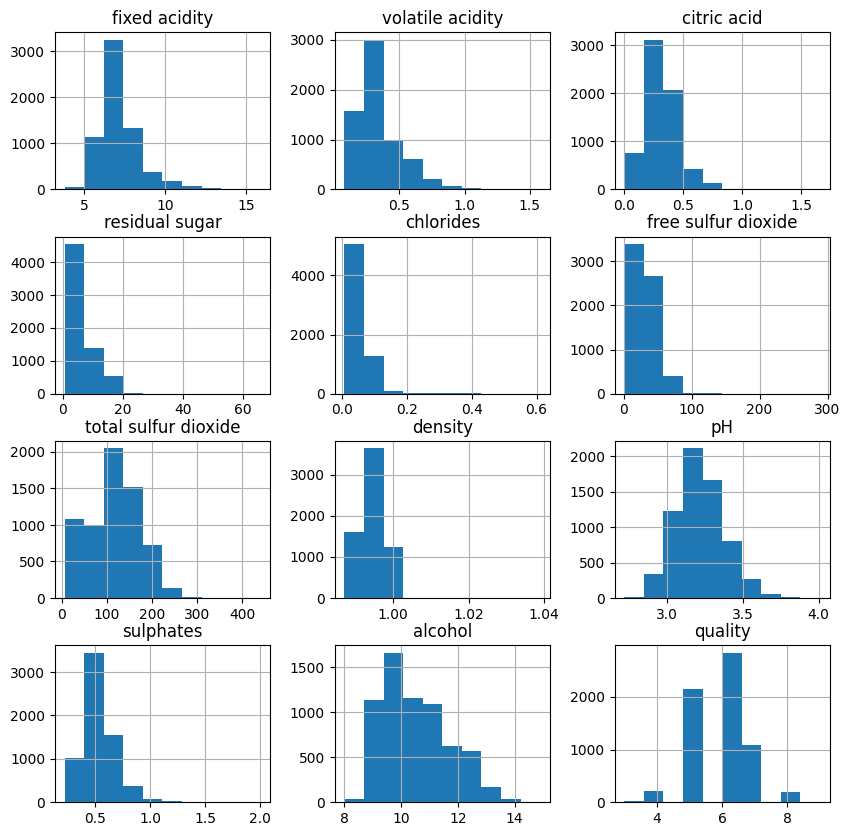

In [5]:
df.hist(figsize=(10, 10))
plt.show()

Ραβδόγραμμα για το χαρακτηριστικό Type

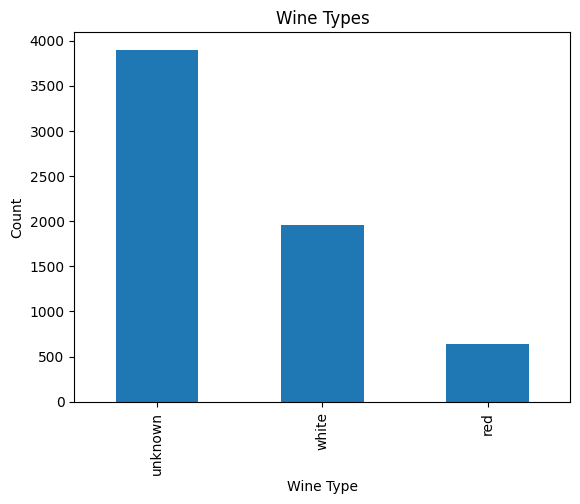

In [8]:
df['type'].value_counts().plot(kind='bar')
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.title("Wine Types")
plt.show()

# Ερώτημα 2

Αντικατάσταση τιμών του type με τις τιμές 0,1,2

In [9]:
type_map = {'white': 0, 'red': 1, 'unknown': 2}
df['type'] = df['type'].map(type_map)

print(df['type'].value_counts())


type
2    3898
0    1959
1     640
Name: count, dtype: int64


Δημιουργία numpy arrays x (inputs), y (targets)

In [10]:
y = df['type'].values
x = df.drop(columns=['type']).values

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (6497, 12)
Shape of y: (6497,)


# Ερώτημα 3

Δημιουργία 2 διαφορετικών συνόλων δεδομένων: (1) (x_known, y_known) και (2) x_unknown.

In [11]:
mask_known = df['type'] != 2
mask_unknown = df['type'] == 2

x_known = df.drop(columns=['type']).values[mask_known]
y_known = df['type'].values[mask_known]

x_unknown = df.drop(columns=['type']).values[mask_unknown]

print("x_known shape:", x_known.shape)
print("y_known shape:", y_known.shape)
print("x_unknown shape:", x_unknown.shape)

x_known shape: (2599, 12)
y_known shape: (2599,)
x_unknown shape: (3898, 12)


# Ερώτημα 4

train-test split του (x_known, y_known) με ποσοστό 70% train – 30% test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.30,
    random_state=42,
    stratify=y_known
)

print("Train set shapes:", x_train.shape, y_train.shape)
print("Test set shapes:", x_test.shape, y_test.shape)

Train set shapes: (1819, 12) (1819,)
Test set shapes: (780, 12) (780,)


# Ερώτημα 5

Εκπαίδευση Ταξινομητή Random Forest και εμφάνιση Αποτελεσμάτων

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
prec_train = precision_score(y_train, y_pred_train, average='weighted')
rec_train = recall_score(y_train, y_pred_train, average='weighted')

acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
prec_test = precision_score(y_test, y_pred_test, average='weighted')
rec_test = recall_score(y_test, y_pred_test, average='weighted')

print("TRAIN SET")
print("Accuracy:", acc_train)
print("F1-score:", f1_train)
print("Precision:", prec_train)
print("Recall:", rec_train)

print("\nTEST SET")
print("Accuracy:", acc_test)
print("F1-score:", f1_test)
print("Precision:", prec_test)
print("Recall:", rec_test)

TRAIN SET
Accuracy: 0.999450247388675
F1-score: 0.9994504535450379
Precision: 0.9994514717820188
Recall: 0.999450247388675

TEST SET
Accuracy: 0.9987179487179487
F1-score: 0.9987190681658766
Precision: 0.9987245914707055
Recall: 0.9987179487179487


Ποιά από τις 2 μετρικές είναι περισσότερο αντιπροσωπευτική στο dataset: Accuracy ή F1;

Η πιο αντιπροσωπευτική μετρική για το συγκεκριμένο dataset είναι η F1-score, γιατί συνδυάζει και την ακρίβεια (precision) και την δυνατότητα εντοπισμού όλων των κλάσεων (recall). Το σύνολο δεδομένων μας δεν είναι ισορροπημένο, καθώς η κατηγορία white εμφανίζεται πιο συχνά από την red. Σε τέτοιες περιπτώσεις, η accuracy μπορεί να δώσει υψηλές τιμές που να μην ισχύουν. Αντίθετα, η F1 αποτυπώνει καλύτερα την πραγματική απόδοση του μοντέλου, καθώς τιμωρεί την λάθος ανίχνευση της μικρότερης κατηγορίας (red) και δίνει μια πιο ισορροπημένη εικόνα.

# Ερώτημα 6

Επανεκπαίδευση του Random Forest με class_weight=’balanced’

In [19]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_pred_train_bal = rf_balanced.predict(x_train)
y_pred_test_bal = rf_balanced.predict(x_test)

acc_train_bal = accuracy_score(y_train, y_pred_train_bal)
f1_train_bal = f1_score(y_train, y_pred_train_bal, average='weighted')
prec_train_bal = precision_score(y_train, y_pred_train_bal, average='weighted')
rec_train_bal = recall_score(y_train, y_pred_train_bal, average='weighted')

acc_test_bal = accuracy_score(y_test, y_pred_test_bal)
f1_test_bal = f1_score(y_test, y_pred_test_bal, average='weighted')
prec_test_bal = precision_score(y_test, y_pred_test_bal, average='weighted')
rec_test_bal = recall_score(y_test, y_pred_test_bal, average='weighted')

print("TRAIN SET Balanced")
print("Accuracy:", acc_train_bal)
print("F1-score:", f1_train_bal)
print("Precision:", prec_train_bal)
print("Recall:", rec_train_bal)

print("\nTEST SET Balanced")
print("Accuracy:", acc_test_bal)
print("F1-score:", f1_test_bal)
print("Precision:", prec_test_bal)
print("Recall:", rec_test_bal)

TRAIN SET Balanced
Accuracy: 0.999450247388675
F1-score: 0.9994504535450379
Precision: 0.9994514717820188
Recall: 0.999450247388675

TEST SET Balanced
Accuracy: 0.9948717948717949
F1-score: 0.9948627235660897
Precision: 0.9948713374047896
Recall: 0.9948717948717949


Παράμετρος class_weight=’balanced’

Σύμφωνα με το documentation της scikit-learn, η παράμετρος class_weight='balanced' υπολογίζει αυτόματα βάρη για κάθε κλάση αντιστρόφως ανάλογα με τη συχνότητά της στο dataset. Με αυτόν τον τρόπο, οι σπάνιες κλάσεις (όπως στην περίπτωση μας το red wine) αποκτούν μεγαλύτερο βάρος και οι συχνές μικρότερο, ώστε ο ταξινομητής να μην ευνοεί την κατηγορία με το μεγαλύτερο πλήθος. Ο υπολογισμός των βαρών γίνεται με τον παρακάτω τύπο: w_i ​= n_samples/n_classes * n_samples_i. Με αυτόν τον τρόπο το μοντέλο αντιμετωπίζει το πρόβλημα της ανισορροπίας κλάσεων και μαθαίνει λαμβάνοντας υπόψη όλες τις κατηγορίες.
	​


# Ερώτημα 7

Υπολογισμός πιθανοτήτων του Μοντέλου με class_weight=’balanced’ στο σύνολο x_unknown

In [23]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

print("Shape of y_unknown_proba:", y_unknown_proba.shape)

print(y_unknown_proba[:20])

Shape of y_unknown_proba: (3898, 2)
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.86 0.14]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.99 0.01]
 [0.87 0.13]]


# Ερώτημα 8

Ετικέτα white ή red συμφωνα με την τιμή της y_unknown_proba

In [27]:
y_unknown_pred = np.array(['unknown'] * x_unknown.shape[0])

proba_red = y_unknown_proba[:, 1]

y_unknown_pred[proba_red > 0.65] = 'red'
y_unknown_pred[proba_red < 0.35] = 'white'

Εμφάνιση Αποτελεσμάτων

In [28]:
counts = pd.Series(y_unknown_pred).value_counts()
for label, count in counts.items():
    print(f"{label:<8} {count}")

white    2939
red      908
unknown  51


# Ερώτημα 9

Ένωση συνόλων x_train + x_unknown_labeled και y_train + y_unknown_labeled

In [35]:
label_map = {'white': 0, 'red': 1}

mask_labeled = y_unknown_pred != 'unknown'
x_unknown_labeled = x_unknown[mask_labeled]
y_unknown_labeled = np.array([label_map[label] for label in y_unknown_pred[mask_labeled]])

x_train_aug = np.vstack([x_train, x_unknown_labeled])
y_train_aug = np.concatenate([y_train, y_unknown_labeled])

print("Ενωμένο x_train shape:", x_train_aug.shape)
print("Ενωμένο y_train shape:", y_train_aug.shape)

Ενωμένο x_train shape: (5666, 12)
Ενωμένο y_train shape: (5666,)


Επανεκπαίδευση του μοντέλου Random Forest και Υπολογισμός Ακρίβειας

In [36]:
rf_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_final.fit(x_train_aug, y_train_aug)

y_pred_train_final = rf_final.predict(x_train)
y_pred_test_final = rf_final.predict(x_test)

acc_train_final = accuracy_score(y_train, y_pred_train_final)
acc_test_final = accuracy_score(y_test, y_pred_test_final)

print("Accuracy on original Train set:", acc_train_final)
print("Accuracy on original Test set:", acc_test_final)

Accuracy on original Train set: 0.999450247388675
Accuracy on original Test set: 0.9948717948717949


# Ερώτημα 10

In [40]:
x_train_loop = x_train.copy()
y_train_loop = y_train.copy()
x_unknown_loop = x_unknown.copy()

label_map_inv = {0: 'white', 1: 'red'}

high_threshold = 0.65
low_threshold = 0.35

iteration = 1

while x_unknown_loop.shape[0] > 0:
    print(f"\nIteration {iteration} ")

    rf_loop = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf_loop.fit(x_train_loop, y_train_loop)

    y_unknown_proba = rf_loop.predict_proba(x_unknown_loop)
    proba_red = y_unknown_proba[:, 1]

    mask_red = proba_red > high_threshold
    mask_white = proba_red < low_threshold
    mask_labeled = mask_red | mask_white

    if np.sum(mask_labeled) == 0:
        print("Stop, no more high-confidence unknown samples")
        break

    y_new = np.array([1 if p else 0 for p in mask_red[mask_labeled]])
    x_new = x_unknown_loop[mask_labeled]

    x_train_loop = np.vstack([x_train_loop, x_new])
    y_train_loop = np.concatenate([y_train_loop, y_new])

    x_unknown_loop = x_unknown_loop[~mask_labeled]

    y_pred_train = rf_loop.predict(x_train)
    y_pred_test = rf_loop.predict(x_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    prec_train = precision_score(y_train, y_pred_train, average='weighted')
    prec_test = precision_score(y_test, y_pred_test, average='weighted')
    rec_train = recall_score(y_train, y_pred_train, average='weighted')
    rec_test = recall_score(y_test, y_pred_test, average='weighted')

    print(f"Added {np.sum(mask_labeled)} new samples to training set.")
    print(f"Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")

    iteration = iteration + 1

print("\nFinal Training Set Size")
print("x_train_loop:", x_train_loop.shape)
print("y_train_loop:", y_train_loop.shape)
print("Remaining unknown samples:", x_unknown_loop.shape[0])



Iteration 1 
Added 3847 new samples to training set.
Train Accuracy: 0.9995, Test Accuracy: 0.9949

Iteration 2 
Added 23 new samples to training set.
Train Accuracy: 0.9995, Test Accuracy: 0.9949

Iteration 3 
Added 2 new samples to training set.
Train Accuracy: 0.9995, Test Accuracy: 0.9962

Iteration 4 
Added 5 new samples to training set.
Train Accuracy: 0.9995, Test Accuracy: 0.9962

Iteration 5 
Added 1 new samples to training set.
Train Accuracy: 0.9995, Test Accuracy: 0.9974

Iteration 6 
Stop, no more high-confidence unknown samples

Final Training Set Size
x_train_loop: (5697, 12)
y_train_loop: (5697,)
Remaining unknown samples: 20


# Μέρος 2– Αξιολόγηση Μοντέλων

# Εισαγωγή του DataSet

In [22]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Ερώτημα 1

Plot του χαρακτηριστικού Quality

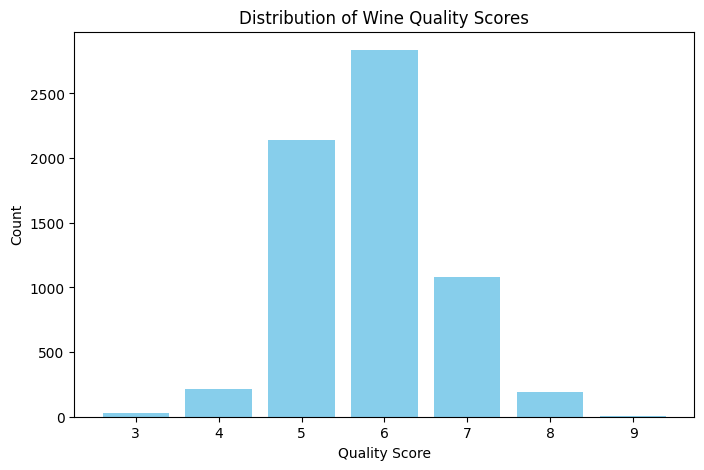

In [23]:
df_full = pd.read_csv("wine-full.csv")
quality_counts = df_full['quality'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")
plt.xticks(quality_counts.index)
plt.show()


Το dataset δεν είναι ισορροπημένο (balanced), διότι η κατανομή της μεταβλητής quality δείχνει ότι οι τιμές 6, 5 και 7 εμφανίζονται πολύ συχνότερα σε σχέση με τις τιμές 3, 4, 8 και 9, οι οποίες έχουν πολύ λίγα δείγματα ή σχεδόν καθόλου.

# Ερώτημα 2

Σύγκριση Ποιότητας Κόκκινου και Λευκού κρασιού

In [24]:
mean_quality = df_full.groupby('type')['quality'].mean()
print("Mean quality per wine type:")
print(mean_quality)

Mean quality per wine type:
type
red      5.636023
white    5.877909
Name: quality, dtype: float64


Δημιουργία boxplot

/tmp/ipython-input-2299731900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='quality', data=df_full, palette=['red','yellow'])


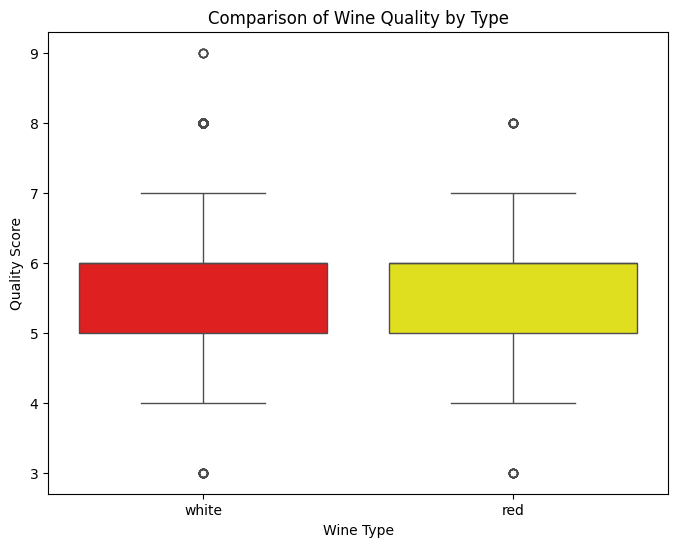

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='quality', data=df_full, palette=['red','yellow'])
plt.title("Comparison of Wine Quality by Type")
plt.ylabel("Quality Score")
plt.xlabel("Wine Type")
plt.show()

Δημιουργία Plot

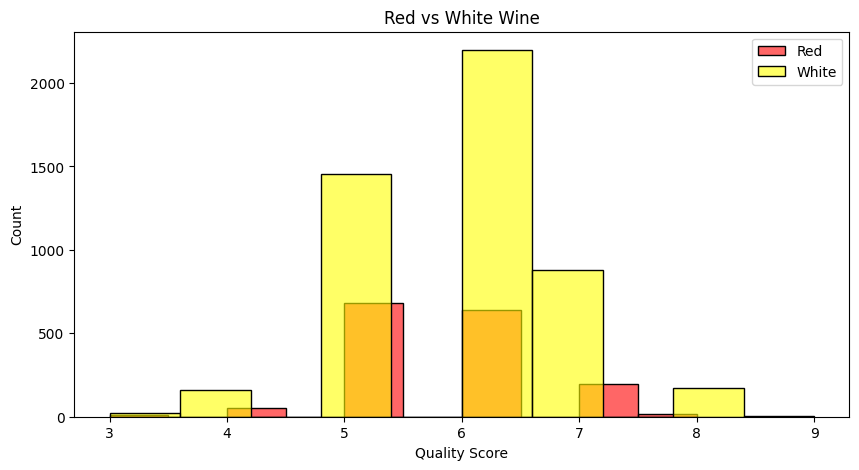

In [26]:
plt.figure(figsize=(10,5))

sns.histplot(data=df_full[df_full['type']=='red'], x='quality', color='red', label='Red', kde=False, bins=10, alpha=0.6)
sns.histplot(data=df_full[df_full['type']=='white'], x='quality', color='yellow', label='White', kde=False, bins=10, alpha=0.6)

plt.title("Red vs White Wine")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.legend()
plt.show()

Όπως βλέπουμε και στον μέσο όρο ποιότητας των δύο ειδών κρασιού, στο boxplot και στο ιστόγραμμα η ποιότητα του κόκκινου και του λευκού κρασιού είναι σχεδόν το ίδιο καλή. Το κόκκινο κρασί έχει μέσο όρο ποιότητας 5.636023 ενώ το λευκό 5.877909 που σημαίνει ότι είναι ελαφρώς καλύτερο με πολύ  μικρή διαφορά.

# Ερώτημα 3

Ποιότητα του κρασιού ανάλογα με το αν είναι ξηρό ή γλυκό

Βρήκα οτι οι τιμές της Residual Sugar για τα παρακατω ειναι η εξης: Ξηρό κρασί: < 4 γρ./λίτρο, Ημίξηρο: 4 - 12 γρ./λίτρο, Ημίγλυκο: 12 - 45 γρ./λίτρο, Γλυκό κρασί: > 45 γρ./λίτρο. Αρα θα το διαχωρίσουμε ως ξηρό αν Residual Sugar < 12 και γλυκό αν Residual Sugar >=12

In [27]:
df_full['Sweetness'] = df_full['residual sugar'].apply(lambda x: 'Sweet' if x >= 12 else 'Dry')

print(df_full['Sweetness'].value_counts())


Sweetness
Dry      5647
Sweet     850
Name: count, dtype: int64


In [28]:
mean_quality_sweetness = df_full.groupby('Sweetness')['quality'].mean()
print("Mean quality by sweetness level:")
print(mean_quality_sweetness)


Mean quality by sweetness level:
Sweetness
Dry      5.827696
Sweet    5.756471
Name: quality, dtype: float64


/tmp/ipython-input-2964268454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sweetness', y='quality', data=df_full, palette=['lightblue','orange'])


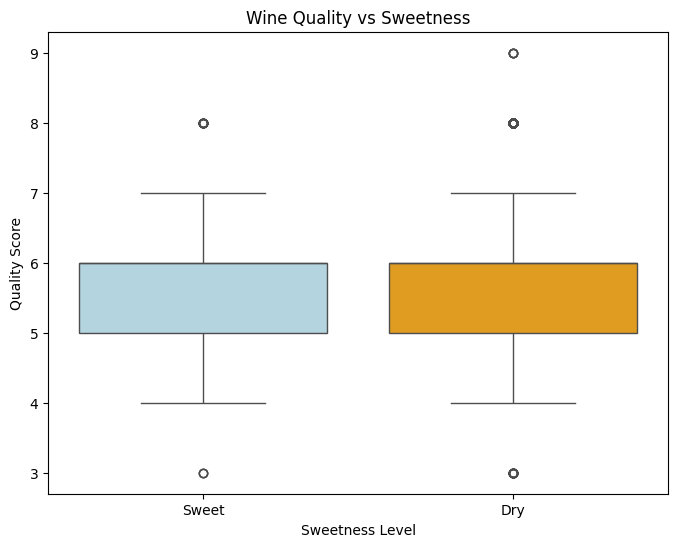

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sweetness', y='quality', data=df_full, palette=['lightblue','orange'])
plt.title("Wine Quality vs Sweetness")
plt.xlabel("Sweetness Level")
plt.ylabel("Quality Score")
plt.show()

Συμφωνα με το boxplot αλλα και με την μεση τιμή ποιότητας ανα τυπο κρασιου Γλυκό ή Ξηρό πάλι δεν υπάρχουν σημαντικές διαφορές, το Ξηρό κρασί έχει μεσο όρο ποιότητας 5.827696 ενώ το γλυκό κρασί έχει 5.756471 άρα δεν μπορούμε να πούμε οτι υπάρχει σημαντική διαφορά και οτι καποιο απο τα δυο είδη έχει καλύτερη ποιότητα. Ωστόσο το ξηρό κρασί εμφανίζεται να έχει τον καλύτερο μεσο ορο ως προς την ποιότητα του.

In [30]:
df_full = df_full.drop(columns=['Sweetness'])


# Ερώτημα 4

Δημιουργία numpy arrays x, y και train και test set 90-10%

In [31]:
df['type'] = df['type'].map({'white': 0, 'red': 1})

x = df.drop(columns=['quality']).values
y = df['quality'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=0
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5847, 12)
x_test shape: (650, 12)
y_train shape: (5847,)
y_test shape: (650,)


# Ερώτημα 5

Εκπαίδευση Decision Tree Regressor



In [32]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

Υπολογισμός MAE

In [33]:
y_pred = dt_reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on test set:", mae)

Mean Absolute Error (MAE) on test set: 0.44769230769230767


# Ερώτημα 6

Επανάληψη της διαδικασίας 3-4, χρησιμοποιώντας 10 διαφορετικά seed (0-9). Και Υπολογισμός μέσου όρου και τυπικής απόκλισης για τη μετρική MAE

In [34]:
mae_list = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.10, random_state=seed
    )

    dt_reg = DecisionTreeRegressor(random_state=0)
    dt_reg.fit(x_train, y_train)

    y_pred = dt_reg.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)

    mae_list.append(mae)

mae_array = np.array(mae_list)

mean_mae = mae_array.mean()
std_mae = mae_array.std()

print("Μέσος Όρος της MAE:", mean_mae)
print("Τυπική Απόκλιση της MAE:", std_mae)

Μέσος Όρος της MAE: 0.4661538461538462
Τυπική Απόκλιση της MAE: 0.026832815729997475


Ο μέσος όρος της μετρικής MAE εκφράζει το αναμενόμενο σφάλμα του μοντέλου, δηλαδή πόσο απέχουν κατά μέσο όρο οι προβλέψεις από τις πραγματικές τιμές. Η τυπική απόκλιση δείχνει πόσο ευαίσθητο είναι αυτό το σφάλμα σε διαφορετικούς τυχαίους διαχωρισμούς train–test. Όταν η τυπική απόκλιση είναι μικρή, το μοντέλο θεωρείται πιο σταθερό και αξιόπιστο, ενώ μια μεγάλη τυπική απόκλιση υποδηλώνει ότι η απόδοσή του μεταβάλλεται σημαντικά ανάλογα με τα δεδομένα που χρησιμοποιούνται. Άρα με τον συνδυασμό μέσου όρου και τυπικής απόκλισης μπορούμε να προσδιορίσουμε ένα εύρος αναμενόμενου σφάλματος και να είμαστε πιο σίγουροι για την επίδοση του μοντέλου.

# Ερώτημα 7

Χωρισμός του συνόλου train set σε train-validation με ποσοστά 80-20%

In [35]:
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.20, random_state=0
)

print("Train final:", x_train_final.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train final: (4677, 12)
Validation: (1170, 12)
Test: (650, 12)


Εύρεση υπερπαραμέτρων για 15 τυχαίους συνδυασμούς και Υπολογισμός της MAE στο training και στο validation set

In [36]:
param_grid = [
    {"max_depth": d, "min_samples_split": s, "min_samples_leaf": l}
    for d, s, l in [
        (None, 2, 1), (5, 2, 1), (10, 2, 1),
        (5, 5, 1),   (10, 5, 1), (15, 5, 1),
        (5, 2, 2),   (10, 2, 2), (15, 2, 2),
        (5, 4, 2),   (10, 4, 2), (15, 4, 2),
        (20, 2, 1),  (20, 4, 2), (None, 4, 2)
    ]
]

results = []

for params in param_grid:
    model = DecisionTreeRegressor(
        random_state=0,
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"]
    )

    model.fit(x_train_final, y_train_final)

    y_train_pred = model.predict(x_train_final)
    y_val_pred   = model.predict(x_val)

    mae_train = mean_absolute_error(y_train_final, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)

    results.append((params, mae_train, mae_val))

for i, (params, train_mae, val_mae) in enumerate(results, start=1):
    print(f"Model {i}: {params}")
    print(f"  Train MAE: {train_mae:.4f}")
    print(f"  Val MAE:   {val_mae:.4f}\n")


Model 1: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.0002
  Val MAE:   0.5068

Model 2: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.5460
  Val MAE:   0.5999

Model 3: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
  Train MAE: 0.3512
  Val MAE:   0.5504

Model 4: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.5460
  Val MAE:   0.5999

Model 5: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.3604
  Val MAE:   0.5619

Model 6: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1}
  Train MAE: 0.1559
  Val MAE:   0.5180

Model 7: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train MAE: 0.5451
  Val MAE:   0.5996

Model 8: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train MAE: 0.3611
  Val MAE:   0.5680

Model 9: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}
  Train

# Ερώτημα 8

training ή validation set είναι περισσότερο αξιόπιστο για την επιλογή υπερπαραμέτρων?

Το training set δεν είναι κατάλληλο για επιλογή υπερπαραμέτρων, επειδή το μοντέλο εκπαιδεύεται με αυτά τα δεδομένα και μπορεί να κανει overfit, εμφανίζοντας όμως χαμηλό σφάλμα. Αντίθετα, το validation set αποτελεί ένα ανεξάρτητο σύνολο που δεν συμμετέχει στην εκπαίδευση και επομένως μας δίνει μια πιο ρεαλιστική εκτίμηση της απόδοσης του μοντέλου σε άγνωστα δεδομένα. Γι’ αυτό η επιλογή υπερπαραμέτρων πρέπει να βασίζεται στο σφάλμα του validation set.

# Ερώτημα 9

Εφαρμογή cross-validation για την επιλογή παραμέτρων

In [37]:
model = DecisionTreeRegressor(random_state=0)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.48452201147406626


# Ερώτημα 10

Υπολογισμός της μετρικής MAE στο test set του καλύτερου μοντέλου

In [38]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)

test_mae = mean_absolute_error(y_test, y_pred_test)

print("Best model test MAE:", test_mae)


Best model test MAE: 0.4846153846153846


Ποια είναι η καλύτερη προσέγγιση ερώτημα 6, 7 ή 9;

Από τις τρεις μεθοδολογίες, η πιο αξιόπιστη είναι η cross-validation προσέγγιση του Ερωτήματος 9. Η μέθοδος του Ερωτήματος 6 χωρίζει τυχαία τα train-test set, και στο Ερώτημα 7 χρησιμοποιείται ένα σταθερό validation set, το οποίο μπορεί και να μην είναι το πιο αντιπροσωπευτικό, στο ερώτημα 9 όμως η cross-validation χωρίζει το training set σε πολλά διαφορετικά train-validation splits και υπολογίζει τον μέσο όρο του σφάλματος, μειώνοντας σημαντικά τον παράγοντα της τυχαιότητας.

# Ερώτημα 11

Επανάληψη της ερώτησης 9 χρησιμοποιώντας πάντα σταθερό max_depth=5

In [39]:
param_grid = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

dt = DecisionTreeRegressor(random_state=0)

grid_search_fixed = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid_search_fixed.fit(x_train, y_train)
print("Best params:", grid_search_fixed.best_params_)
best_tree = grid_search_fixed.best_estimator_

Best params: {'min_samples_leaf': 1, 'min_samples_split': 2}


Σχεσιασμός του Δέντρου με max_depth=4

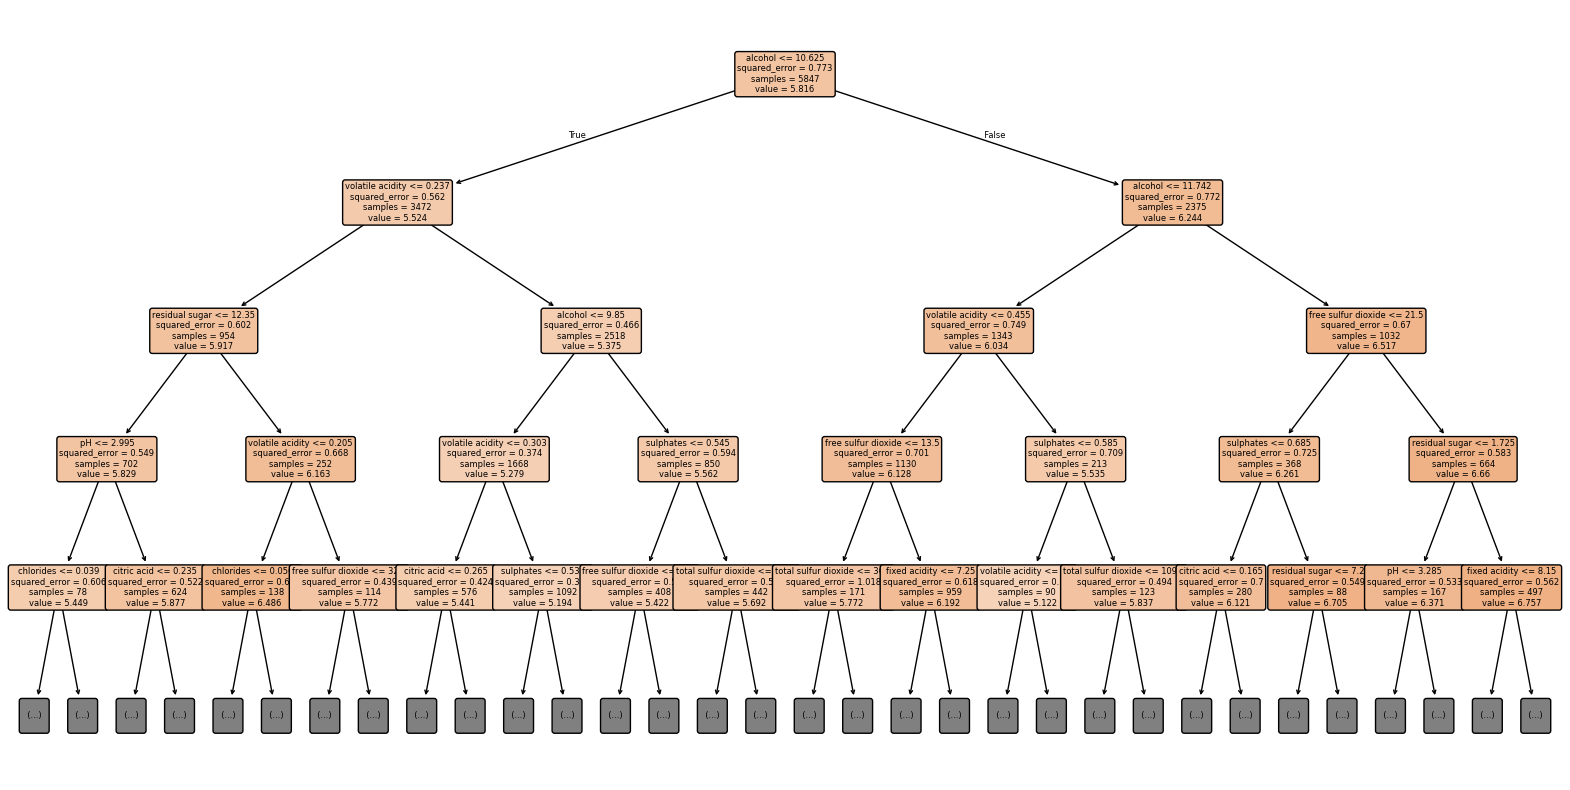

In [43]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=df.drop(columns=['quality']).columns,
          filled=True,
          rounded=True,
          fontsize=6,
          max_depth=4)
plt.show()

Εξαγωγή Κανόνων του Δέντρου

Το δέντρο απόφασης δείχνει ότι ο σημαντικότερος παράγοντας για την πρόβλεψη της ποιότητας του κρασιού είναι το ποσοστό αλκοόλ: κρασιά με alcohol πάνω από 10.5 τείνουν να έχουν υψηλότερη ποιότητα, ενώ όσα βρίσκονται κάτω από αυτό το όριο χαμηλότερη. Σε κρασιά με χαμηλό αλκοόλ, η volatile acidity παίζει επίσης σημαντικό ρόλο χαμηλές τιμές (κάτω από περίπου 0.24) οδηγούν σε καλύτερη ποιότητα, ενώ υψηλότερες σε χαμηλότερη. Σε αυτό το ίδιο υποδέντρο, η residual sugar διαφοροποιεί περαιτέρω την ποιότητα, με μέτρια επίπεδα να σχετίζονται με καλύτερες τιμές και πολύ υψηλές συγκεντρώσεις να μειώνουν το τελικό σκορ. Στο τμήμα του δέντρου που αφορά κρασιά με υψηλό αλκοόλ, η volatile acidity παραμένει καθοριστικό κριτήριο: χαμηλές τιμές της οδηγούν σε υψηλότερη ποιότητα. Επιπλέον, οι συγκεντρώσεις free sulfur dioxide και sulphates επηρεάζουν τις προβλέψεις, καθώς χαμηλότερο free SO₂ και υψηλότερα sulphates συνδέονται με καλύτερη ποιότητα. Συνολικά, οι κανόνες που προκύπτουν υποδεικνύουν ότι κρασιά με υψηλό αλκοόλ, χαμηλή οξύτητα, ισορροπημένη γλυκύτητα, χαμηλό free SO₂ και επαρκή ποσότητα sulphates τείνουν να χαρακτηρίζονται ως υψηλότερης ποιότητας.

Ραβδόγραμμα για τη σημαντικότητα κάθε χαρακτηριστικού

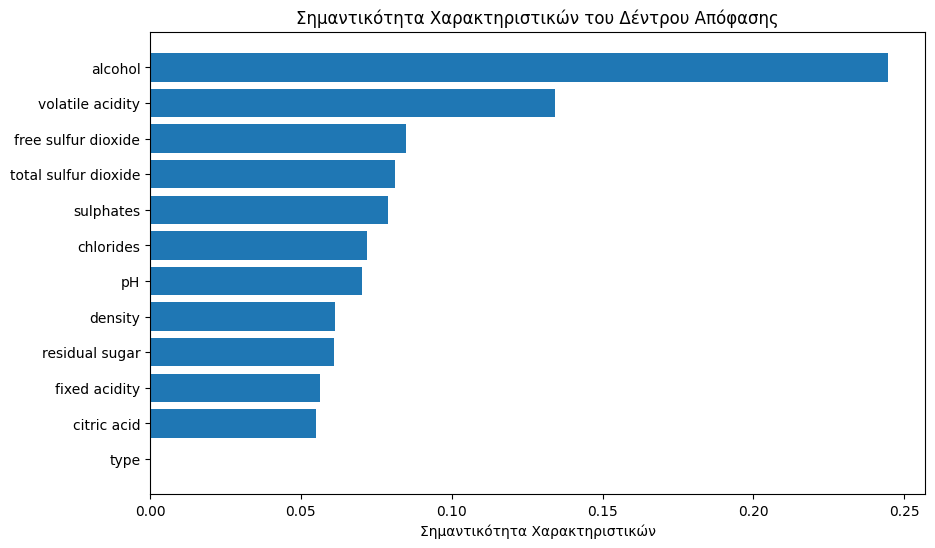

In [46]:
importances = best_tree.feature_importances_
feature_names = df.drop(columns=['quality']).columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Σημαντικότητα Χαρακτηριστικών")
plt.title("Σημαντικότητα Χαρακτηριστικών του Δέντρου Απόφασης")
plt.show()
